# UK-High value Customers Identification
The dataset was obtained from [kaggle](https://www.kaggle.com/vik2012kvs/high-value-customers-identification).

In this study, we will investigate who are the high value customers based on the data provided. 

Background from the author:
#### Description
##### Background of Problem Statement:
A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017). The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves. There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

##### Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. 

##### Dataset Description:
This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store.

Attribute Description:

| Varaible | Definition|
| --- | --- |
| InvoiceNo | Invoice number (A 6-digit integral number uniquely assigned to each transaction) |
| StockCode | Product (item) code |
| Description | Product (item) name |
| Quantity | The quantities of each product (item) per transaction |
| InvoiceDate | The day when each transaction was generated |
| UnitPrice | Unit price (Product price per unit) |
| CustomerID | Customer number (Unique ID assigned to each customer) |
| Country | Country name (The name of the country where each customer resides) |
 
 
 
 
 
 
 

In [1]:
# Call in pacakages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
df = pd.read_csv("Ecommerce.csv", encoding= 'unicode_escape')

In [3]:
# Show the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [4]:
# Find the dimension of the dataset
display(df.shape)

# Change to date type to datetime
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

# Retreive year and month from datetime
df["Year"] = df.InvoiceDate.dt.year
df["Month"] = df.InvoiceDate.dt.month

(541909, 9)

In [5]:
# Find missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
Year                0
Month               0
dtype: int64

Description feature is missing 1454 rows.  
CustomerID is missing 135080 rows. This is 24.9% of the total rows. As for this exploratory data analysis, this missing customer id will be considrered as guest accounts, which they purchased the items without signing up the account.

In [6]:
# Find unique/distinct numbers for each columns
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate      305
UnitPrice       1630
CustomerID      4372
Country           38
Unnamed: 8         0
Year               2
Month             12
dtype: int64

In [7]:
# Take a quick peek at the cost of items and number of items sold
df.UnitPrice.value_counts()

1.25       50496
1.65       38181
0.85       28497
2.95       27768
0.42       24533
           ...  
4575.64        1
125.96         1
147.13         1
3060.60        1
244.51         1
Name: UnitPrice, Length: 1630, dtype: int64

In [8]:
# Find the lowest price and highest price
display(min(df.UnitPrice))
display(max(df.UnitPrice))
display(df[df.UnitPrice<=0].UnitPrice.count())

-11062.06

38970.0

2517

In [9]:
# Find the lowest price and highest item quantity sold
display(min(df.Quantity))
display(max(df.Quantity))
display(df[df.Quantity<=0].Quantity.count())

-80995

80995

10624

Both lowest price and number of sold items contain negative numbers.  
There are 2517 and 10624 that are equal or lesser than $0 dollars and sold item quantities respectively. Both features cannot be negative or zero. This data will be excluded from the EDA.

In [10]:
# exclude UnitPrice & Quantuty equal or lesser than $0
df = df[df.UnitPrice>0]
df = df[df.Quantity>0]

In [11]:
# After excluding negative numbers for Quantity and UnitPrice features, we will not multiply both features to get the total price
df["Total"] = df["Quantity"] * df["UnitPrice"]

In [12]:
# Find minimum and maximum price
display(min(df["Total"]))
display(max(df["Total"]))

0.001

168469.6

In [13]:
# Find the total total spending of each customer by country
Country_Cutomer_totalSpending = df.groupby(["Country","CustomerID"]).agg({"Total":"sum"}).sort_values("Total",ascending=False).reset_index()
Country_Cutomer_totalSpending.head(10)

,Country,CustomerID,Total
0,Netherlands,14646.0,280206.02
1,United Kingdom,18102.0,259657.30
2,United Kingdom,17450.0,194550.79
3,United Kingdom,16446.0,168472.50
4,EIRE,14911.0,143825.06
5,Australia,12415.0,124914.53
6,EIRE,14156.0,117379.63
7,United Kingdom,17511.0,91062.38
8,United Kingdom,16029.0,81024.84
9,United Kingdom,12346.0,77183.60


A customuer ID 14646 spent the most and purchased total price of $280,206.02. We will take a look at this customer later.

In [83]:
# Find the average spending of each customer for each country
Country_averageSpending = Country_Cutomer_totalSpending.groupby(["Country"]).agg({"Total":"mean","CustomerID":"count"}).round(2)
Country_averageSpending

,Total,CustomerID
Country,,
Australia,15391.26,9
Austria,927.15,11
Bahrain,274.20,2
Belgium,1647.85,25
Brazil,1143.60,1
Canada,916.60,4
Channel Islands,2272.27,9
Cyprus,1698.80,8
Czech Republic,826.74,1


EIRE (Ireland) average is ridiculously high compared with other nations. There are only three customers. Let's take a look at EIRE.

In [84]:
EIRE = df[df["Country"] == "EIRE"]
display(EIRE[EIRE["Total"] > 1000])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total
58117,541220,22423,REGENCY CAKESTAND 3 TIER,160,2017-01-12,10.95,14156.0,EIRE,2017,1,1752.00
58122,541220,22838,3 TIER CAKE TIN RED AND CREAM,96,2017-01-12,12.75,14156.0,EIRE,2017,1,1224.00
58123,541220,22840,ROUND CAKE TIN VINTAGE RED,144,2017-01-12,6.95,14156.0,EIRE,2017,1,1000.80
106278,545320,22838,3 TIER CAKE TIN RED AND CREAM,96,2017-02-27,12.75,14156.0,EIRE,2017,2,1224.00
117054,546328,M,Manual,1,2017-03-09,1687.17,14911.0,EIRE,2017,3,1687.17
117055,546329,M,Manual,1,2017-03-09,1687.17,14911.0,EIRE,2017,3,1687.17
232891,557377,M,Manual,1,2017-06-18,1917.00,NaN,EIRE,2017,6,1917.00
232892,557377,M,Manual,1,2017-06-18,1216.12,NaN,EIRE,2017,6,1216.12
285362,561901,22667,RECIPE BOX RETROSPOT,408,2017-07-29,2.55,14156.0,EIRE,2017,7,1040.40
285366,561901,21843,RED RETROSPOT CAKE STAND,216,2017-07-29,10.95,14156.0,EIRE,2017,7,2365.20


In [87]:
EIRE.groupby(["CustomerID"]).agg({"Total":"sum","InvoiceNo":"count"})

,Total,InvoiceNo
CustomerID,,
14016.0,4341.21,161
14156.0,117379.63,1400
14911.0,143825.06,5675


We can see that out of 3 buyers, 2 buyers total spending are well over \\$100k. Thus, the average is \\$88515.30.

# Find the Monthly Average Spending of Customer

In [15]:
# Group by Month
df_Year_Month = df.groupby(["Country","CustomerID","Year", "Month"]).agg({"Quantity":"sum","Total":sum}).reset_index()

# Group by Country, CustomerID and Find the Average
df_monthlyAvgSpending = df_Year_Month.groupby(["Country","CustomerID"]).agg({"Total":"mean"}).round(2).reset_index()

# Display first 5 rows
df_monthlyAvgSpending.head()

,Country,CustomerID,Total
0,Australia,12386.0,200.95
1,Australia,12388.0,463.44
2,Australia,12393.0,527.53
3,Australia,12415.0,13879.39
4,Australia,12422.0,193.10


In [16]:
# Find the maximum and minimum average spending of the month
display(max(df_monthlyAvgSpending.Total))
display(min(df_monthlyAvgSpending.Total))

84236.25

3.75

A buyer spent as high as 84236.25 and as low as 3.75 per month.

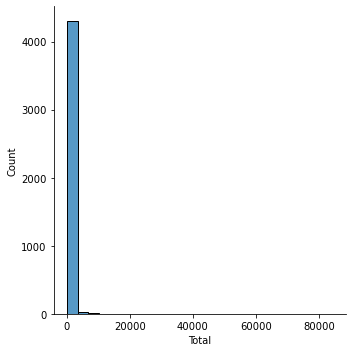

In [104]:
sns.displot(df_monthlyAvgSpending, x="Total", bins=25)

Most of buyers spend \\$5000 per month.

# Boxplot of customers for each countries

In [17]:
# Find the countries that are in this dataset
df_monthlyAvgSpending["Country"].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype=object)

In [18]:
# Make Each Country dataframe into a dictionary format
df_dict={}
for i in range(37):
    df_dict[i] = df_monthlyAvgSpending[df_monthlyAvgSpending["Country"] == df_monthlyAvgSpending["Country"].unique()[i]]

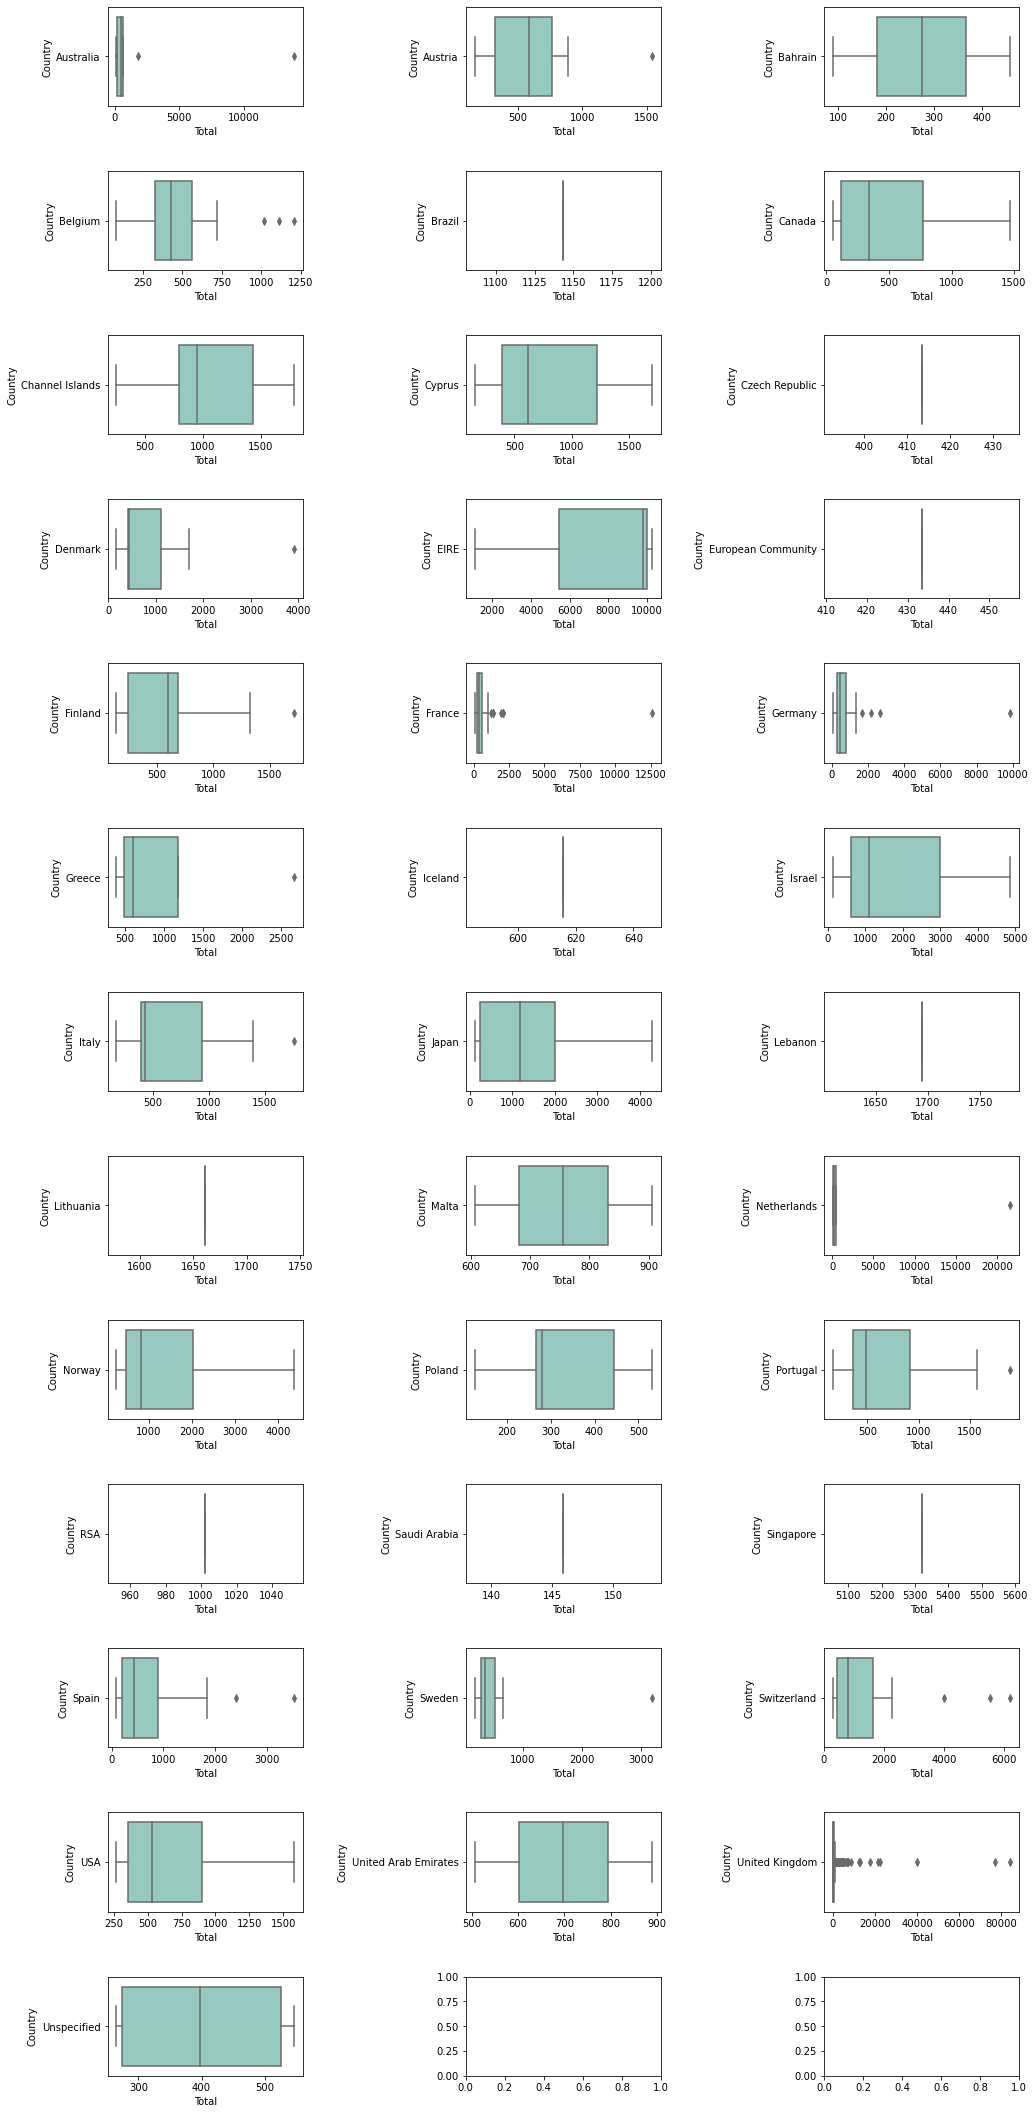

In [105]:
# Plot each country into boxplot
f, axes = plt.subplots(13, 3, figsize=(15,30), sharex=False, sharey=False)
j, k = 0, 0
for i in range(37):
    if i % 3 ==0 and i != 0:
        j += 1
        k = 0
    sns.boxplot(x="Total",y="Country",data=df_dict[i], palette="Set3", ax = axes[j,k])
    k +=1

f.tight_layout(pad=3.0)

In [20]:
# Customer Monthly Spending. Groupy by Country, Customer, and Month
customer_monthly = df.groupby(["Country","CustomerID", "Month"]).agg({"Total":"sum"}).reset_index()

In [21]:
# Group one more time to find the monthly spending per customer
customer_monthly_df = customer_monthly.groupby(["Country","CustomerID"]).agg({"Total":"mean"}).reset_index()

In [22]:
# Categorize/ Classify the big spender to lowest spender
customer_monthly_df.loc[customer_monthly_df["Total"] >= 10000, "Class"] = "VVIP"
customer_monthly_df.loc[customer_monthly_df["Total"].between(5000,9999), "Class"] = "VIP"
customer_monthly_df.loc[customer_monthly_df["Total"].between(3000,4999), "Class"] = "Diamond"
customer_monthly_df.loc[customer_monthly_df["Total"].between(1500,2999), "Class"] = "Platinum"
customer_monthly_df.loc[customer_monthly_df["Total"].between(1000,1499), "Class"] = "Gold"
customer_monthly_df.loc[customer_monthly_df["Total"].between(500,999), "Class"] = "Silver"
customer_monthly_df.loc[customer_monthly_df["Total"].between(100,499), "Class"] = "Bronze"
customer_monthly_df.loc[customer_monthly_df["Total"].between(0,99), "Class"] = "Iron"

##### Histogram of Monthly Spending of Customer

In [95]:
classHist = customer_monthly_df["Class"].value_counts().reset_index()

In [106]:
customer_monthly_df

,Country,CustomerID,Total,Class
0,Australia,12386.0,200.950000,Bronze
1,Australia,12388.0,463.443333,Bronze
2,Australia,12393.0,527.533333,Silver
3,Australia,12415.0,13879.392222,VVIP
4,Australia,12422.0,193.100000,Bronze
...,...,...,...,...
4341,United Kingdom,18287.0,918.640000,Silver
4342,Unspecified,12363.0,276.000000,Bronze
4343,Unspecified,12743.0,546.430000,Silver
4344,Unspecified,14265.0,265.090000,Bronze


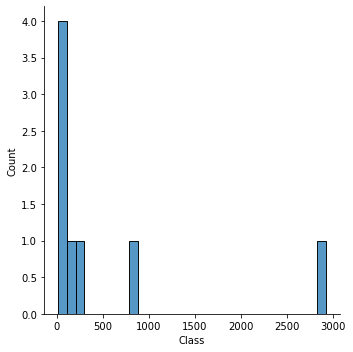

In [109]:
sns.displot(classHist, x="Class", bins=30)

In [108]:
display(customer_monthly_df["Class"].value_counts())
display(customer_monthly_df["Class"].value_counts(normalize=True))

Bronze      2925
Silver       868
Iron         220
Gold         170
Platinum     107
Diamond       22
VIP           16
VVIP          12
Name: Class, dtype: int64

Bronze      0.673963
Silver      0.200000
Iron        0.050691
Gold        0.039171
Platinum    0.024654
Diamond     0.005069
VIP         0.003687
VVIP        0.002765
Name: Class, dtype: float64

In [23]:
class_list = ["VVIP","VIP","Diamond","Platinum","Gold","Silver","Bronze","Iron"]
# customer_monthly_df["Class"] = pd.Categorical(customer_monthly_df["Class"], categories=["VVIP","VIP","Diamond","Platinum","Gold","Silver","Bronze","Iron"])
for i in class_list:
    display(customer_monthly_df[customer_monthly_df["Class"] == i])

,Country,CustomerID,Total,Class
3,Australia,12415.0,13879.392222,VVIP
81,EIRE,14911.0,11985.421667,VVIP
111,France,12536.0,12601.830000,VVIP
318,Netherlands,14646.0,23350.501667,VVIP
422,United Kingdom,12346.0,77183.600000,VVIP
1324,United Kingdom,14096.0,13032.958000,VVIP
2029,United Kingdom,15098.0,39916.500000,VVIP
2516,United Kingdom,15749.0,22267.150000,VVIP
2692,United Kingdom,16000.0,12393.700000,VVIP
3020,United Kingdom,16446.0,84236.250000,VVIP


,Country,CustomerID,Total,Class
80,EIRE,14156.0,9781.635833,VIP
224,Germany,12590.0,9864.260000,VIP
356,Singapore,12744.0,5319.822500,VIP
395,Switzerland,12357.0,6207.670000,VIP
401,Switzerland,12409.0,5536.335000,VIP
504,United Kingdom,12931.0,5256.995000,VIP
1042,United Kingdom,13694.0,5419.968333,VIP
1319,United Kingdom,14088.0,7213.115714,VIP
1690,United Kingdom,14607.0,5523.166667,VIP
2193,United Kingdom,15311.0,5063.991667,VIP


,Country,CustomerID,Total,Class
77,Denmark,12435.0,3914.945000,Diamond
283,Israel,12688.0,4873.810000,Diamond
298,Japan,12753.0,4285.878000,Diamond
324,Norway,12433.0,3343.967500,Diamond
328,Norway,12752.0,4366.780000,Diamond
364,Spain,12454.0,3528.340000,Diamond
394,Sweden,17404.0,3545.202222,Diamond
398,Switzerland,12378.0,4008.620000,Diamond
609,United Kingdom,13081.0,4048.197143,Diamond
613,United Kingdom,13089.0,4902.152500,Diamond


,Country,CustomerID,Total,Class
5,Australia,12424.0,1760.960000,Platinum
18,Austria,12818.0,1542.080000,Platinum
58,Channel Islands,14935.0,1784.710000,Platinum
59,Channel Islands,14936.0,1627.404000,Platinum
61,Cyprus,12359.0,1593.145000,Platinum
...,...,...,...,...
3901,United Kingdom,17675.0,1697.856667,Platinum
3926,United Kingdom,17706.0,1750.748333,Platinum
4017,United Kingdom,17846.0,2033.100000,Platinum
4025,United Kingdom,17857.0,2687.904000,Platinum


,Country,CustomerID,Total,Class
31,Belgium,12397.0,1204.950000,Gold
41,Belgium,12449.0,1016.822500,Gold
46,Belgium,12876.0,1109.010000,Gold
47,Brazil,12769.0,1143.600000,Gold
50,Canada,17444.0,1470.020000,Gold
...,...,...,...,...
4033,United Kingdom,17865.0,1052.632000,Gold
4074,United Kingdom,17919.0,1304.040000,Gold
4188,United Kingdom,18079.0,1217.323333,Gold
4197,United Kingdom,18092.0,1295.465714,Gold


,Country,CustomerID,Total,Class
2,Australia,12393.0,527.533333,Silver
6,Australia,12431.0,689.333750,Silver
9,Austria,12358.0,584.030000,Silver
10,Austria,12360.0,887.353333,Silver
13,Austria,12374.0,742.930000,Silver
...,...,...,...,...
4322,United Kingdom,18259.0,779.533333,Silver
4331,United Kingdom,18272.0,615.716000,Silver
4341,United Kingdom,18287.0,918.640000,Silver
4343,Unspecified,12743.0,546.430000,Silver


,Country,CustomerID,Total,Class
0,Australia,12386.0,200.950000,Bronze
1,Australia,12388.0,463.443333,Bronze
4,Australia,12422.0,193.100000,Bronze
7,Australia,12434.0,403.070000,Bronze
8,Australia,16321.0,124.550000,Bronze
...,...,...,...,...
4336,United Kingdom,18278.0,173.900000,Bronze
4337,United Kingdom,18280.0,180.600000,Bronze
4340,United Kingdom,18283.0,209.488000,Bronze
4342,Unspecified,12363.0,276.000000,Bronze


,Country,CustomerID,Total,Class
20,Bahrain,12353.0,89.000,Iron
33,Belgium,12401.0,84.300,Iron
51,Canada,17844.0,51.560,Iron
104,France,12506.0,73.500,Iron
141,France,12659.0,91.680,Iron
...,...,...,...,...
4316,United Kingdom,18249.0,95.340,Iron
4328,United Kingdom,18268.0,25.500,Iron
4332,United Kingdom,18273.0,68.000,Iron
4338,United Kingdom,18281.0,80.820,Iron


# Which country has most VVIP and VIP?

In [25]:
customer_monthly_df.groupby(["Country","Class"]).agg({"Class":"count"})

Class
Country        Class          
Australia      Bronze        5
               Platinum      1
               Silver        2
               VVIP          1
Austria        Bronze        5
...                        ...
United Kingdom Silver      756
               VIP          11
               VVIP          8
Unspecified    Bronze        2
               Silver        2

[117 rows x 1 columns]

In [33]:
VVIP_VIP = customer_monthly_df[(customer_monthly_df["Class"] == "VVIP") | (customer_monthly_df["Class"] == "VIP")]
# VVIP_VIP.groupby(["Country", "Class"]).agg({"Country":"count"})
VVIP_VIP.groupby(["Country","Class"]).agg({"Class":"count"})

Class
Country        Class       
Australia      VVIP       1
EIRE           VIP        1
               VVIP       1
France         VVIP       1
Germany        VIP        1
Netherlands    VVIP       1
Singapore      VIP        1
Switzerland    VIP        2
United Kingdom VIP       11
               VVIP       8

### Diamond and Platinum

In [34]:
Diamond_Platinum = customer_monthly_df[(customer_monthly_df["Class"] == "Diamond") | (customer_monthly_df["Class"] == "Platinum")]
Diamond_Platinum.groupby(["Country","Class"]).agg({"Class":"count"})

Class
Country         Class          
Australia       Platinum      1
Austria         Platinum      1
Channel Islands Platinum      2
Cyprus          Platinum      2
Denmark         Diamond       1
                Platinum      1
Finland         Platinum      1
France          Platinum      3
Germany         Platinum      3
Greece          Platinum      1
Israel          Diamond       1
Italy           Platinum      1
Japan           Diamond       1
                Platinum      2
Lebanon         Platinum      1
Lithuania       Platinum      1
Norway          Diamond       2
                Platinum      1
Portugal        Platinum      2
Spain           Diamond       1
                Platinum      2
Sweden          Diamond       1
Switzerland     Diamond       1
                Platinum      3
USA             Platinum      1
United Kingdom  Diamond      14
                Platinum     78

In [121]:
# VVIP to Gold member spending total
VVG = customer_monthly_df[customer_monthly_df["Class"].isin(["VVIP","VIP","Diamond","Platinum","Gold"])]
VVG["Total"].sum()

959434.9593881674

In [125]:
# Silver to Iron spending total
SI = customer_monthly_df[~customer_monthly_df["Class"].isin(["VVIP","VIP","Diamond","Platinum","Gold"])]
SI["Total"].sum()

1409837.5737233043

## No.1 Customer 14646 from Netherlands, total sum of \\$ 280206.02 

In [110]:
customer14646 = df[df["CustomerID"] == 14646]
customer14646["StockCode"].value_counts().head(10)
c14646StockQuantity = customer14646.groupby("StockCode").agg({"Quantity":"sum","Total":"sum"}).sort_values("Quantity", ascending=False).reset_index()
c14646StockTotal = customer14646.groupby("StockCode").agg({"Quantity":"sum","Total":"sum"}).sort_values("Total", ascending=False).reset_index()
first10above1000 = c14646StockQuantity[c14646StockQuantity["Quantity"] > 1000].head(10)

In [111]:
display("Items that")
display(first10above1000)
display(c14646StockTotal.head(10))

,StockCode,Quantity,Total
0,23084,4801,9568.48
1,22629,4492,7415.40
2,21212,4104,1726.80
3,22630,4096,6758.40
4,22326,3120,7956.00
5,21731,2376,3459.60
6,20719,2300,1656.00
7,20724,2100,1512.00
8,22243,2016,2923.20
9,85099B,2000,3468.00


,StockCode,Quantity,Total
0,23084,4801,9568.48
1,22326,3120,7956.00
2,22629,4492,7415.40
3,22630,4096,6758.40
4,22328,1584,4039.20
5,85099B,2000,3468.00
6,21731,2376,3459.60
7,22423,288,3153.60
8,22243,2016,2923.20
9,20712,1500,2629.00


for i in range(len(first10above1000)):
    display(customer14646[customer14646["StockCode"] == first10above1000["StockCode"][i]])

In [116]:
customer14646.groupby(["StockCode","Description"]).agg({"Quantity":"sum","Total":"sum"}).sort_values(by=["Total","Quantity"],ascending=False).head(10)

,,Quantity,Total
StockCode,Description,,
23084,RABBIT NIGHT LIGHT,4801,9568.48
22326,ROUND SNACK BOXES SET OF4 WOODLAND,3120,7956.00
22629,SPACEBOY LUNCH BOX,4492,7415.40
22630,DOLLY GIRL LUNCH BOX,4096,6758.40
22328,ROUND SNACK BOXES SET OF 4 FRUITS,1584,4039.20
85099B,JUMBO BAG RED RETROSPOT,2000,3468.00
21731,RED TOADSTOOL LED NIGHT LIGHT,2376,3459.60
22423,REGENCY CAKESTAND 3 TIER,288,3153.60
22243,5 HOOK HANGER RED MAGIC TOADSTOOL,2016,2923.20


# Conclusion

| Varaible | Definition| Count | Percentage |
| --- | --- | --- | --- |
| VVIP | >= \\$10000 | 12 | 0.3% |
| VIP | \\$5000-\\$9999 | 16 | 0.4% |
| Diamond | \\$3000-\\$4999 | 22 | 0.5% |
| Platinum | \\$1500-\\$2999 | 107 | 2.5% |
| Gold | \\$1000-\\$1499 | 170 | 3.9% |
| Silver | \\$500-$999 | 868 | 20.0% |
| Bronze | \\$100-\\$499 | 2925 | 67.4% |
| Iron | \\$0-\\$99 | 220 | 5.0% |

We found that 7.6% customers (N=327) are spending more than \\$1000. Yet, this group of customers are accounted for 68% of total sales.  
On the otherside, 92.4% customers are spending less than \\$1000 and has 32% of total sales.

In summary, VVIP to Gold should the customer that the client need to target as high-value customers.